# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es categórica, asi que no habrá que reescalar con funciones como el logaritmo.


**Información de atributos:**
**clases:**
comestible=e
venenoso=p

**cap-shape:**
campana=b
cónica=c
convexa=x
plana=f
nudosa=k
hundida=s

**cap-surface:**
fibrosa = f
ranuras = g
escamosa = y
lisa = s

**cap-color&gill-color&stalk-color-above-ring&veil-color&spore-print-color:**
marrón=n
buff=b
canela=c
gris=g
verde=r
rosa=p
púrpura=u
rojo=e
blanco=w
amarillo=y

**bruises:**
moretones=t
no=f

**odor:**
almendra=a
anís=l
creosota=c
pescado=y
fétido=f
moho=m
ninguno=n
picante=p
picante=s

**gill-attachment:**
adjunto = a
descendente = d
libre = f
con muescas = n

**gill-spacing:**
cerca=c
abarrotado=w
distante=d

**gill-size:**
ancho=b
estrecho=n


**stalk-shape:**
agrandándose = e
ahusándose = t

**stalk-root:**
bulboso=b
club=c
cup=u
equal=e
rhizomorphs=z
rooted=r
missing=?

**stalk-surface-above-ring&stalk-surface-below-ring**: fibroso=f,escamoso=y,sedoso=k
liso=s

**veil-type:**
parcial=p
universal=u

**ring-number:**
ninguno=n
uno=o
dos=t

**ring-type:**
telaraña=c
evanescente=e
flaring=f
grande=l
ninguno=n
colgante=p
revestimiento=s
zona=z

**population:**
abundante=a
agrupada=c
numerosa=n
dispersa=s
varias=v
solitaria=y

**habitat:**
pastos=g
hojas=l
prados=m
caminos=p
urbano=u
residuos=w
bosques=d

In [4]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

c:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
c:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#Creamos el df y le añadimos separación de ;
data = pd.read_csv('mushrooms.csv')

### Leer conjunto de datos y primer vistazo

In [7]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploración de datos

In [8]:
# Descripción del conjunto de datos, estándard.

In [9]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
# Información sobre el tipo de datos de cada feature.

In [11]:
data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Calcular el número de nulos de cada feature

In [12]:
# Igual que otras veces, una linea, contar los nulos por variable.
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [13]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
features = []
unique_values = []

for column in data.columns:
    features.append(column)
    unique_values.append(data[column].unique())

data_n = pd.DataFrame({
    'Feature': features,
    'Valores Únicos': unique_values
})
data_n

,Feature,Valores Únicos
0,class,"[p, e]"
1,cap-shape,"[x, b, s, f, k, c]"
2,cap-surface,"[s, y, f, g]"
3,cap-color,"[n, y, w, g, e, p, b, u, c, r]"
4,bruises,"[t, f]"
5,odor,"[p, a, l, n, f, c, y, s, m]"
6,gill-attachment,"[f, a]"
7,gill-spacing,"[c, w]"
8,gill-size,"[n, b]"
9,gill-color,"[k, n, g, p, w, h, u, e, b, r, y, o]"


#### Tratar aquellos valores que entendamos que sean nulos


In [14]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.
data['stalk-root'].value_counts()
# Hay una gran cantidad de "?" en "stalk-root" trataremos este dato como otro cualquiera. Entendemos que posiblemente sea la forma de hacer un modelo mas robusto en este aspecto.
data = data.replace('?', 'unknown')
# Decidimos cambiar la '?' por 'unknown' para evitar el problema de categoria más adelante.

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [15]:
# Dejar por el camino si procede.
# Como hemos visto anteriormente la columna "veil-type" no aporta valor al modelo ya que es idéntico para todos los registros.
data.drop(['veil-type'], axis=1, inplace=True)

#### Separar entre variables predictoras y variables a predecir

In [16]:
# La variable que trata de predecir este conjunto de datos es 'class'.
y = data['class']
X = data.drop(columns=['class'], axis=1)

In [17]:
pd.set_option('display.max_columns', None)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,unknown,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,unknown,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,unknown,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,unknown,s,k,w,w,w,o,e,w,v,l


#### Codificar correctamente las variables categóricas a numéricas

### Get dummies

In [20]:
dummies = pd.get_dummies(X, drop_first=True)
# El resultado nos aparecía más limpio con GetDummies y decidimos hacerlo así para mayor limpieza de datos:
# One Hot Encoder (una linea).
# encoder = OneHotEncoder(sparse_output=False, drop='first')  
# 'drop' para evitar la multicolinealidad

In [21]:
dummies.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_jj', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_jj', 'stalk-root_c', 'stalk-root_e',
       'stalk-root_r', 'stalk-root_unknown', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-a

#### Train test split, duh ;)

In [22]:
# Os lo dejamos a todos igual :)
X_train, X_test, y_train, y_test = train_test_split(dummies, y, test_size=0.33, random_state=42)

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no hay dibujitos) así que vamos a hacer algunos. Tenemos el problema de que son muchas variables... Bueno, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

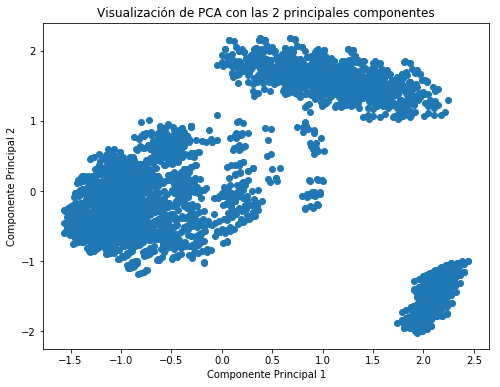

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca =pca.transform(X_test)
# Paso 3: Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de PCA con las 2 principales componentes')
plt.show()

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [24]:
from sklearn.ensemble import RandomForestClassifier

# 1. Definir el clasificador y el número de estimadores
rf = RandomForestClassifier()
# 2. Entrenar en train
rf.fit(X_train_pca, y_train)
# 3. Calcular la precisión sobre test
y_pred = rf.predict(X_test_pca)

c:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
c:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [25]:
from sklearn.metrics import accuracy_score

# y_pred son tus predicciones
# y_test son los valores reales

# Calcular la precisión
precision = accuracy_score(y_test, y_pred)

print(f'La precisión del modelo es: {precision}')

La precisión del modelo es: 0.9291309212980231


Oh sh*t, resulta que lo clava!! Vuelve arriba, revisa que hayas partido bien la variable predictora, corre!

Naaaah que es broma, está bien, es un conjunto sencillete y Random Forest es muy bueno en su trabajo xD Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [26]:
X_train.shape

(5443, 95)

Ufffffff ¿Muchas features no? Vamos a reducir a ver qué tal.¿Cómo? Venga, mira como se llama la sección, seguro que te da una pista ;)

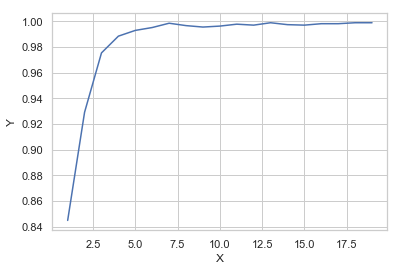

In [27]:
import seaborn as sns

n_features = range(1,20)# definir un rango de valores a probar
scores = []

for n in n_features:

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    # 2. Aprender PCA sobre X_train
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Entrenar Random Forest
    # 1. Definir el RF
    # 2. Entrenar clasificador
    rf = RandomForestClassifier()
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    # Guardar el score
    precision = accuracy_score(y_test, y_pred)
    scores+=[precision]
sns.set(style="whitegrid")
sns.lineplot(x=n_features, y=scores)
plt.xlabel('X')
plt.ylabel('Y')

# Muestra el gráfico
plt.show()


Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




Silhouette Score: 0.20670781700557284
Silhouette Score: 0.251188093705936
Silhouette Score: 0.2497917024894114
Silhouette Score: 0.26865470957733734
Silhouette Score: 0.29125702612292814
Silhouette Score: 0.30699296960572026
Silhouette Score: 0.2766443440887269
Silhouette Score: 0.26734426852529264
Silhouette Score: 0.24596810301389865
Silhouette Score: 0.24035916688488113
Silhouette Score: 0.2073950615300449


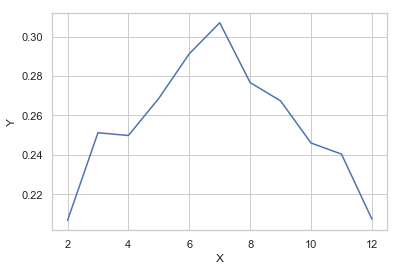

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
k_values = range(2,13)      # definir un rango

for a in k_values:
    # Definir Kmeans y ajustar
    pca = PCA(n_components=n)
    dummies_pca = pca.fit_transform(dummies)
    kmeans = KMeans(n_clusters=a).fit(dummies_pca)
    silhouette_avg = silhouette_score(dummies_pca, kmeans.labels_)
    print(f'Silhouette Score: {silhouette_avg}')
    scores+=[silhouette_avg]


sns.set(style="whitegrid")
sns.lineplot(x=k_values, y=scores)
plt.xlabel('X')
plt.ylabel('Y')

# Muestra el gráfico
plt.show()

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``factorplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

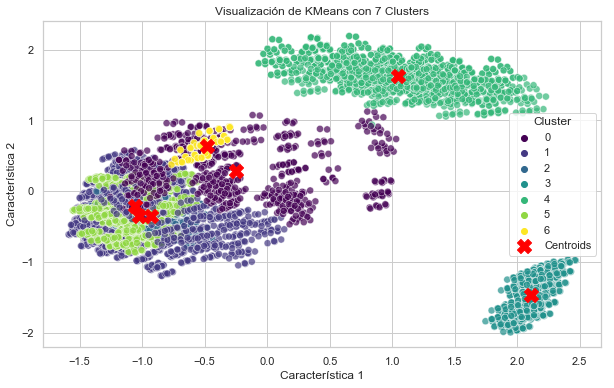

In [29]:
# Aprender Kmeans con el valor de K obtenido.

clusters = 7# Definir y entrenar Kmeans.
kmeans = KMeans(n_clusters=clusters).fit(dummies_pca)

# Preparar el factorplot. 
# factorplot que ya no está disponible en la versión más reciente de Seaborn. En su lugar, hemos utilizado scatterplot.
clusters = kmeans.labels_

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dummies_pca[:, 0], y=dummies_pca[:, 1], hue=clusters, palette="viridis", s=50, alpha=0.7, legend="full")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Visualización de KMeans con 7 Clusters')
plt.legend(title='Cluster')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

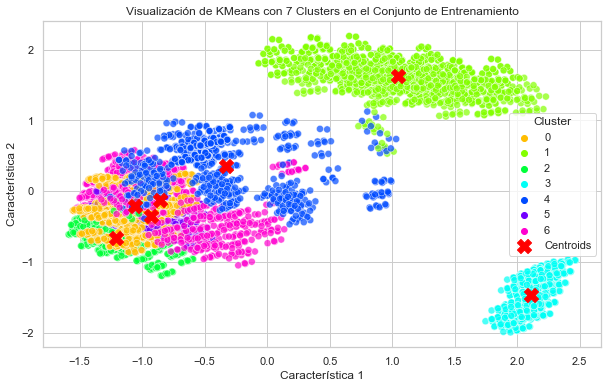

In [30]:
# Entrenar PCA para representar.
kmeans = KMeans(n_clusters=7, random_state=0).fit(dummies_pca)
clusters_train = kmeans.labels_

paleta_colores = sns.color_palette("hsv", 7)

# Crear el gráfico para el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dummies_pca[:, 0], y=dummies_pca[:, 1], hue=clusters_train, palette=paleta_colores, s=50, alpha=0.7, legend="full")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('Visualización de KMeans con 7 Clusters en el Conjunto de Entrenamiento')
plt.legend(title='Cluster')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


Text(-0.04,0.5,'Count')

<Figure size 720x360 with 0 Axes>

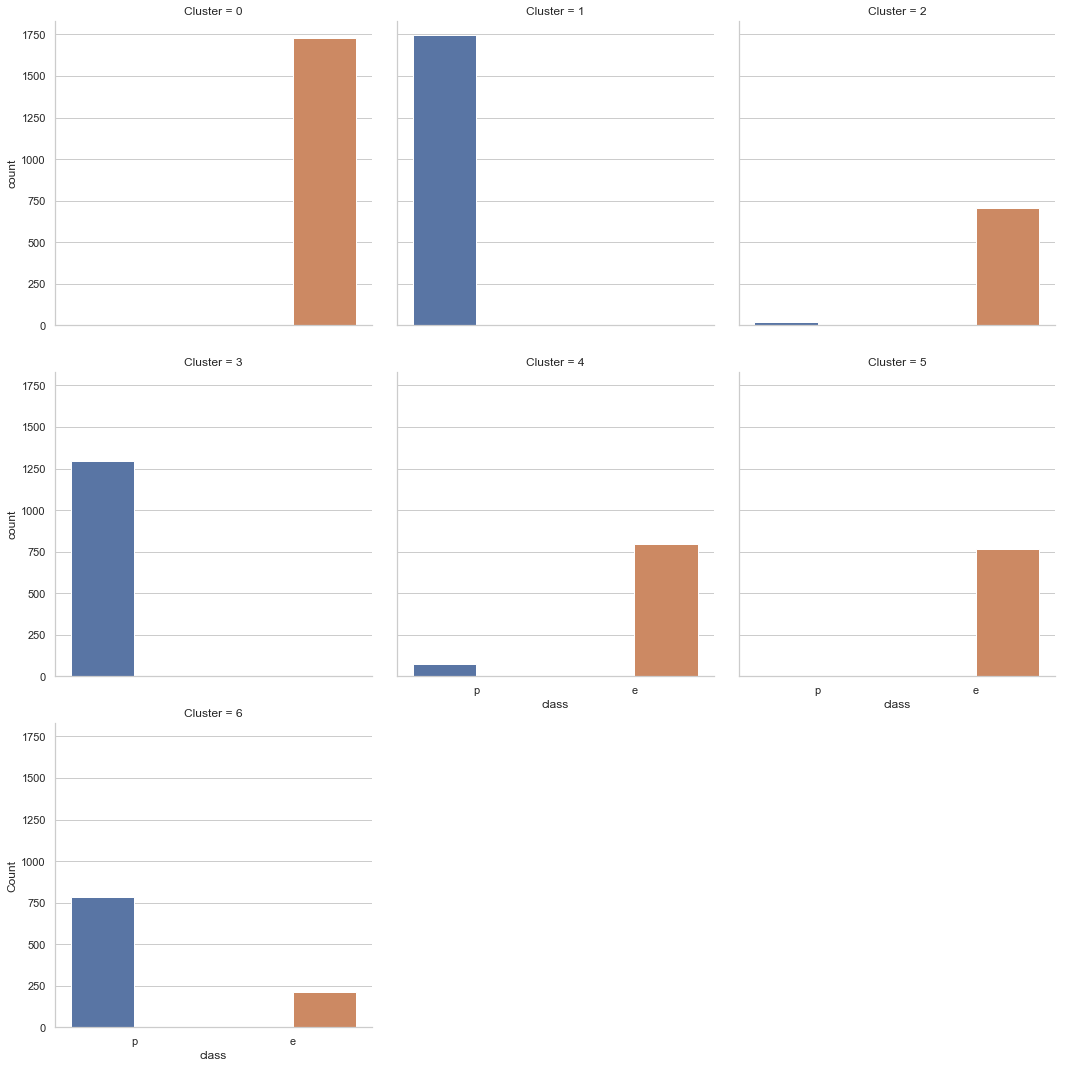

In [37]:
data['Cluster'] =kmeans.labels_ 

plt.figure(figsize = (10, 5))
sns.catplot(data = data, col = 'Cluster',  x='class', hue='class', kind='count', col_wrap=3)
plt.ylabel('Count')

# Decidimos utilizar una visualizaicón con barras ya que facilita una rápida visualización de los clusters óptimos.

Identificamos que los cluster 1 y 3 serían los más óptimos para predecir las setas venenosas.
Identificamos que el cluster 0 y 5 serían los más óptimo para predecir las setas comestibles.

¿Es bastante parecido no? Tan bueno como el maravilloso Random Forest no es, pero ha conseguido identificar bastante bien los distintos puntos del dataset. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos, el resto de por si nos saca la variable a predecir ya limpia.